In [23]:

import os 
import sqlite3
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pandas as pd
import matplotlib
sql_to_reterive_cat_fact = "SELECT fact FROM CAT_FACTS"
with sqlite3.connect("dbs/interview.db") as conn:
    cursor = conn.cursor()
    cursor.execute(sql_to_reterive_cat_fact)
    facts = cursor.fetchall()
    print(facts[0][0]) # print the first fact 


Unlike dogs, cats do not have a sweet tooth. Scientists believe this is due to a mutation in a key taste receptor.


In [6]:
spacy_nlp = spacy.load("en_core_web_sm")
spacied_cat_facts = [spacy_nlp(fact[0]) for fact in facts]

# remove stop words and punctuations
stopwords = spacy.lang.en.stop_words.STOP_WORDS

spacied_cat_facts_wo_stopwords_punc = []

for spacied_fact in spacied_cat_facts:
    spacied_cat_facts_wo_stopwords_punc.append(
	[token for token in spacied_fact if token.text not in stopwords and not token.is_punct])


In [7]:
# lemmatize the words
lemmatized_cat_facts = []

for spacied_fact in spacied_cat_facts_wo_stopwords_punc:
    lemmatized_cat_facts.append([token.lemma_ for token in spacied_fact])

In [19]:
# Score the sentiment of each fact
clean_texts = []
sentiment_scores = []

for fact in lemmatized_cat_facts:
	clean_text = " ".join(fact)
	doc = spacy_nlp(clean_text)
	clean_texts.append(clean_text)
	sentiment_scores.append(doc._.blob.polarity)

# Store the sentiment scores in a dataframe
df = pd.DataFrame({"clean_text": clean_texts, "sentiment_score": sentiment_scores})


In [20]:
# add sentiment base on the score
df["sentiment"] = df["sentiment_score"].apply(lambda x: "positive" if x > 0 else "negative" if x < 0 else "neutral")

<AxesSubplot: ylabel='sentiment'>

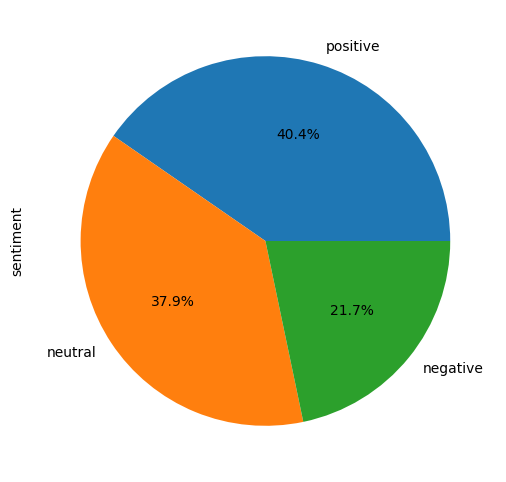

In [24]:
# plot pie chart of the sentiment
df["sentiment"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(6, 6))